Inspiré par l'exellent livre de Sebastian Raschka (@rasbt) : [Python Mahcine learning](http://www.amazon.fr/Python-Machine-Learning-Sebastian-Raschka/dp/1783555130/ref=sr_1_1?ie=UTF8&qid=1456765399&sr=8-1&keywords=python+machine+learning)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
#sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Numérique : 

## Log transformation log(x) / log(1 + x)

Graphiques représentant le nombre de retraité et le nombre de vote FN par ville durant le second tour des elections régionales (lien [github](https://github.com/armgilles/regionnales2015)).

- A gauche : pas de log
- A droit : log

On observe une meilleure distribution des données si celle-ci sont transformées 

![caption](log_transf.png)

## Normalisation

In [37]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df.columns = ["label", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids",
                "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines",
                "Proline"]
df.head()

,label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [38]:
df.dtypes

label                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [39]:
df[['Alcohol', 'Malic acid']].describe()

,Alcohol,Malic acid
count,178.000000,178.000000
mean,13.000618,2.336348
std,0.811827,1.117146
min,11.030000,0.740000
25%,12.362500,1.602500
50%,13.050000,1.865000
75%,13.677500,3.082500
max,14.830000,5.800000


La feature "Alcohol" (%/vol) et "Malic acid" (g/l) n'ont pas les mêmes échelles. On compare donc des choux et des carottes...

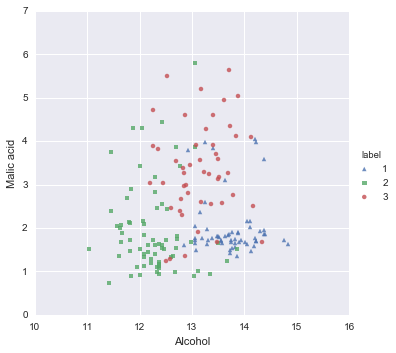

In [40]:
sns.lmplot(x="Alcohol", y="Malic acid", hue="label", data=df, fit_reg=False, markers=['^', 's', 'o'])

In [41]:
from sklearn import preprocessing

df_scale = df.copy()

for col in df_scale.columns[1:]:
    scaler = preprocessing.StandardScaler()
    scaler.fit(df_scale[col])
    df_scale[col] = scaler.transform(df_scale[col])

df_scale[['Alcohol', 'Malic acid']].describe()

,Alcohol,Malic acid
count,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17
std,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00
25%,-7.882448e-01,-6.587486e-01
50%,6.099988e-02,-4.231120e-01
75%,8.361286e-01,6.697929e-01
max,2.259772e+00,3.109192e+00


"alcool" et "acide malique" ont maintenant **une moyenne de 0 et un std de 1**

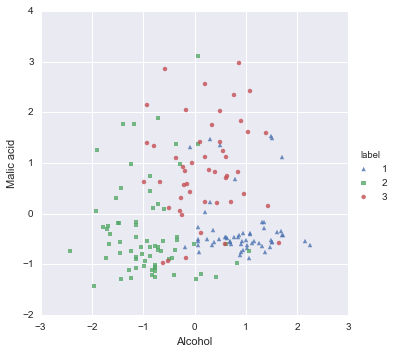

In [42]:
sns.lmplot(x="Alcohol", y="Malic acid", hue="label", data=df_scale, fit_reg=False, markers=['^', 's', 'o'])

La normalisation est crucial lors d'un PCA (Principal Component Analysis), observons la différence à l'aide d'un graphique :

In [43]:
# Using PCA
from sklearn.decomposition import PCA

# X = features, y = label
X, y = df.iloc[:, 1:].values, df.iloc[:,0].values # No scale
X_scale, y = df_scale.iloc[:, 1:].values, df_scale.iloc[:,0].values #scale

# non scale
pca = PCA(n_components=2).fit(X)
data_pca = pca.transform(X)
pca_df = pd.DataFrame(data_pca, columns=['pca_1', 'pca_2'])
pca_df['label'] = df['label']

# scale
pca_scale = PCA(n_components=2).fit(X_scale)
data_pca_scale = pca_scale.transform(X_scale)
pca_scale_df = pd.DataFrame(data_pca_scale, columns=['pca_1', 'pca_2'])
pca_scale_df['label'] = df['label']

Le PCA permet de réduire le nombre dimension tout en gardant le maximum d'information. On extrait en quelques sorte le substrat de l'information. Plus d'info [ici](http://scikit-learn.org/stable/modules/decomposition.html#principal-component-analysis-pca) et via cette [vidéo](https://www.youtube.com/watch?v=4pnQd6jnCWk&ab_channel=PauloRicardoGherardiHein)

In [44]:
pca_df.head()

,pca_1,pca_2,label
0,-318.562979,-21.492131,1
1,-303.097420,5.364718,1
2,-438.061133,6.537309,1
3,-733.240139,-0.192729,1
4,11.571428,-18.489995,1


### PCA non normalisé :

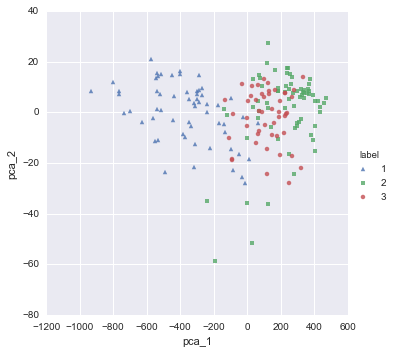

In [45]:
g=sns.lmplot(x="pca_1", y="pca_2", hue="label", data=pca_df, fit_reg=False, markers=['^', 's', 'o'])

### PCA normalisé

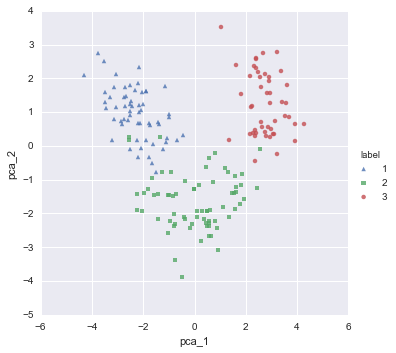

In [46]:
sns.lmplot(x="pca_1", y="pca_2", hue="label", data=pca_scale_df, fit_reg=False, markers=['^', 's', 'o'])

Dans la verion "PCA normalisé", on retrouve nos 3 clusters assez délimités alors que pour la version "PCA non normalisé", la délimitation est beaucoup chaotique.

# Catégorie

Les features contenant du texte doivent etre transformées afin de nourir l'algorithme par la suite.

In [70]:
import pandas as pd
df = pd.DataFrame([
            ['green', 'M', 10.1, 'class1'], 
            ['red', 'L', 13.5, 'class2'], 
            ['blue', 'XL', 15.3, 'class1']])

df.columns = ['color', 'size', 'prize', 'class label']
df

,color,size,prize,class label
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [71]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['class label'] = LE.fit_transform(df['class label'])

In [72]:
df

,color,size,prize,class label
0,green,M,10.1,0
1,red,L,13.5,1
2,blue,XL,15.3,0


Ensuite se pose la question pour "color" et "size" :
    - "size": Il y a un ordre de grandeur. Il faut donc respecter cette ordre de grandeur avec notre transformation.
    - "color": Suivant le type d'algorythme utilisé, on peux la transformé comme "class label" ou bien la "binariser", c'est à dire que chaque valeur possible sera une colonne (avec des 0 ou 1)

## Ordinal features

In [74]:
size_mapping = {
           'XL': 3,
           'L': 2,
           'M': 1}

df['size'] = df['size'].map(size_mapping)
df

,color,size,prize,class label
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


## Nominal features

In [76]:
pd.get_dummies(df)

,size,prize,class label,color_blue,color_green,color_red
0,1,10.1,0,0,1,0
1,2,13.5,1,0,0,1
2,3,15.3,0,1,0,0
